<a href="https://colab.research.google.com/github/FluffyP4nd4/Taco_object_extractor/blob/master/Taco_object_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import cv2
import numpy as np
import urllib

def extract_object(image_path, segmentation_points, output_path):
    # Load the image
    #img = cv2.imread('/content/drive/MyDrive/Test_data/train/images/IMG_0147.png')
    req = urllib.request.urlopen(image_path)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)

    points = []
    for i in range(0, len(segmentation_points), 2):
      x = segmentation_points[i]
      y = segmentation_points[i+1]
      points.append((x, y))

    #print(points)

    # Convert the segmentation points to a NumPy array
    #pts = np.array(points, np.float32)

    # Reshape the array to a 2D array
    #pts = pts.reshape((-1, 1, 2))
    pts = np.array(points, dtype=np.int32).reshape(-1,2)

    # Create a mask of zeros with the same shape as the image
    mask = np.zeros_like(img)
    

    # Draw the contour of the object on the mask using the segmentation points
    cv2.fillPoly(mask, [pts],  color =(255,255,255))

    
       
    # Apply the mask to the resized image to extract the object
    object_region = cv2.bitwise_and(img, mask)
    
    #Getting the bounding points for resising
    x, y, w, h = cv2.boundingRect(np.array(pts).reshape((-1, 1, 2)))

    # Resize the original image to fit the bounding box
    resized_img = cv2.resize(object_region[y:y+h, x:x+w], (w, h))
    

    

    # Save the extracted object region to a file
    cv2.imwrite(output_path, resized_img)

In [51]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import os

# Initialize COCO annotations object
coco = COCO('./annotations.json')

# Get category ID of desired category
catIds = coco.getCatIds(catNms=['Glass cup'])
catId = catIds[0]

# Get image IDs for all images in the dataset
imgIds = coco.getImgIds()

# Iterate over the image IDs and display the images with the desired category
for imgId in imgIds:
    # Load the image
    img = coco.loadImgs(imgId)[0]
    
    # Load the annotations of the image
    annIds = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(annIds)
    
    # Check if the image contains the desired category
    annot = None
    has_desired_category = False
    for ann in anns:
        if ann['category_id'] == catId:
            has_desired_category = True
            annot = ann['segmentation']
            
            break
    
    # Display the image if it contains the desired category
    if has_desired_category:
        # Load and show the image using matplotlib
        #I = plt.imread('path/to/images/' + img['file_name'])
        #f = img['flickr_url']
        #a = io.imread(f)
        #print(annot)
        #plt.imshow(a)
        #plt.show()
        extract_object(img['flickr_url'], annot[0], os.path.basename(img['file_name']))
        


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [52]:
from google.colab.patches import cv2_imshow

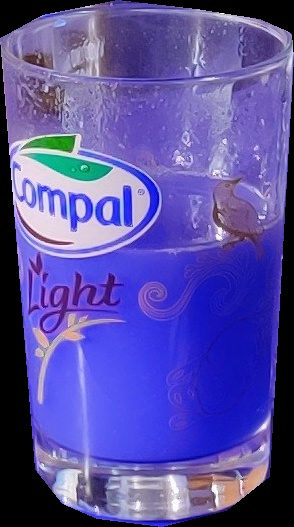

In [53]:
img = cv2.imread('/content/000011.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(RGB_img)